## SeisNoise Implementation for OOI Cabled Array Data

### Standard SeisNoise code adapted to save cross correlation files of multiple years between two specific stations


In [1]:
using SeisNoise, SeisIO, Plots, HDF5

┌ Warning: Error requiring `HDF5` from `Plots`
│   exception = (LoadError("/home/jupyter_share/.julia/packages/Plots/GGa6i/src/backends/hdf5.jl", 36, UndefVarError(:Group)), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x00007f9fce788c7f, Ptr{Nothing} @0x00007f9fce81b5cc, Ptr{Nothing} @0x00007f9fce81bb35, Ptr{Nothing} @0x00007f9fce81b80e, Ptr{Nothing} @0x00007f9fce81c451, Ptr{Nothing} @0x00007f9fce81ced7, Base.InterpreterIP in top-level CodeInfo for Plots._hdf5_implementation at statement 4, Ptr{Nothing} @0x00007f9fce8387b1, Ptr{Nothing} @0x00007f9fce838ee3, Ptr{Nothing} @0x00007f9fce8389fc, Ptr{Nothing} @0x00007f9fce8389fc, Ptr{Nothing} @0x00007f9fce83a5c9, Ptr{Nothing} @0x00007f9fb3bdc307, Ptr{Nothing} @0x00007f9fce7ff2b9, Ptr{Nothing} @0x00007f9fb3ae3582, Ptr{Nothing} @0x00007f9fb384d695, Ptr{Nothing} @0x00007f9fce7ff2b9, Ptr{Nothing} @0x00007f9fce810096, Ptr{Nothing} @0x00007f9facf3c02e, Ptr{Nothing} @0x00007f9fce7ff2b9, Ptr{Nothing} @0x00007f9fce81bb55, Ptr{Nothing} @0x00

In [2]:
fs = 40.0 # sampling frequency in Hz
freqmin,freqmax = 0.01,16.0 # min and max frequencies
cc_step, cc_len = 450, 1800 # corrleation step and length in S
maxlag = 60. # maximum lag time in correlation

60.0

In [3]:
for j in 2015:2020      

    for i in 1:366 

        if i<10
            a=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/00",string(i),"/HYS14.OO.",string(j),".00",string(i),".BHZ")
            b=string("/data/wsd01/OOI-Data/HYSB1/",string(j),"/00",string(i),"/HYSB1.OO.",string(j),".00",string(i),".BHZ")
        elseif i>=10 && i<100
            a=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/0",string(i),"/HYS14.OO.",string(j),".0",string(i),".BHZ")
            b=string("/data/wsd01/OOI-Data/HYSB1/",string(j),"/0",string(i),"/HYSB1.OO.",string(j),".0",string(i),".BHZ")
        elseif i>=100 && i<1000
            a=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/",string(i),"/HYS14.OO.",string(j),".",string(i),".BHZ")
            b=string("/data/wsd01/OOI-Data/HYSB1/",string(j),"/",string(i),"/HYSB1.OO.",string(j),".",string(i),".BHZ")
        end

        try 
            S1=read_data(a) 
            S2=read_data(b)
            S1.fs=[40.0]
            S2.fs=[40.0]
        
            process_raw!(S1,fs)
            process_raw!(S2,fs)
        

            R = RawData.([S1,S2],cc_len,cc_step)
            detrend!.(R)
            taper!.(R)
            bandpass!.(R,freqmin,freqmax,zerophase=true)
            FFT = rfft.(R)
            whiten!.(FFT,freqmin,freqmax)
            C = correlate(FFT[1],FFT[2],maxlag)
            save_corr(C,"/data/wsd01/corrdata/raw/")
 
        catch; 
            println("cannot process "*a) 
               
        end
    end
end


cannot process /data/wsd01/OOI-Data/HYS14/2015/066/HYS14.OO.2015.066.BHZ
cannot process /data/wsd01/OOI-Data/HYS14/2015/161/HYS14.OO.2015.161.BHZ
cannot process /data/wsd01/OOI-Data/HYS14/2015/162/HYS14.OO.2015.162.BHZ
cannot process /data/wsd01/OOI-Data/HYS14/2015/165/HYS14.OO.2015.165.BHZ
cannot process /data/wsd01/OOI-Data/HYS14/2015/166/HYS14.OO.2015.166.BHZ
cannot process /data/wsd01/OOI-Data/HYS14/2015/366/HYS14.OO.2015.366.BHZ
cannot process /data/wsd01/OOI-Data/HYS14/2016/198/HYS14.OO.2016.198.BHZ
cannot process /data/wsd01/OOI-Data/HYS14/2016/199/HYS14.OO.2016.199.BHZ
cannot process /data/wsd01/OOI-Data/HYS14/2016/285/HYS14.OO.2016.285.BHZ
cannot process /data/wsd01/OOI-Data/HYS14/2017/008/HYS14.OO.2017.008.BHZ
cannot process /data/wsd01/OOI-Data/HYS14/2017/165/HYS14.OO.2017.165.BHZ
cannot process /data/wsd01/OOI-Data/HYS14/2017/193/HYS14.OO.2017.193.BHZ
cannot process /data/wsd01/OOI-Data/HYS14/2017/281/HYS14.OO.2017.281.BHZ
cannot process /data/wsd01/OOI-Data/HYS14/2017/318/

In [ ]:
readdir("/data/wsd01/OOI-Data/HYS14/2015/066/")

### standard seisnoise code for plotting cross correlation function for one day between two stations

In [ ]:
using SeisNoise, SeisIO, Plots
fs = 36. # sampling frequency in Hz
freqmin,freqmax = 0.1,9.0 # min and max frequencies
cc_step, cc_len = 450, 1800 # corrleation step and length in S
maxlag = 60. # maximum lag time in correlation

j=2015
i=63
        if i<10
            a=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/00",string(i),"/HYS14.OO.",string(j),".00",string(i),".SHE")
            b=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/00",string(i),"/HYS14.OO.",string(j),".00",string(i),".SHN")
        elseif i>=10 && i<100
            a=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/0",string(i),"/HYS14.OO.",string(j),".0",string(i),".SHE")
            b=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/0",string(i),"/HYS14.OO.",string(j),".0",string(i),".SHN")
        elseif i>=100 && i<1000
            a=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/",string(i),"/HYS14.OO.",string(j),".",string(i),".SHE")
            b=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/",string(i),"/HYS14.OO.",string(j),".",string(i),".SHN")
        end

        S1=read_data(a)
        S2=read_data(b)

        process_raw!(S1,fs)
        process_raw!(S2,fs)

        R = RawData.([S1,S2],cc_len,cc_step)
        detrend!.(R)
        taper!.(R)
        bandpass!.(R,freqmin,freqmax,zerophase=true)
        FFT = rfft.(R)
        whiten!.(FFT,freqmin,freqmax)
        C = correlate(FFT[1],FFT[2],maxlag)
        clean_up!(C,freqmin,freqmax)
        abs_max!(C)
        plot(C)


In [ ]:
using SeisNoise, SeisIO, Plots
fs = 40. # sampling frequency in Hz
freqmin,freqmax = 0.1,20 # min and max frequencies
cc_step, cc_len = 450, 1800 # corrleation step and length in S
maxlag = 60. # maximum lag time in correlation

j=2015
i=69
        if i<10
            a=string("/data/wsd01/OOI-Data/HYSB1/",string(j),"/00",string(i),"/HYSB1.OO.",string(j),".00",string(i),".SHZ")
            b=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/00",string(i),"/HYS14.OO.",string(j),".00",string(i),".SHZ")
        elseif i>=10 && i<100
            a=string("/data/wsd01/OOI-Data/HYSB1/",string(j),"/0",string(i),"/HYSB1.OO.",string(j),".0",string(i),".SHZ")
            b=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/0",string(i),"/HYS14.OO.",string(j),".0",string(i),".SHZ")
        elseif i>=100 && i<1000
            a=string("/data/wsd01/OOI-Data/HYSB1/",string(j),"/",string(i),"/HYSB1.OO.",string(j),".",string(i),".SHZ")
            b=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/",string(i),"/HYS14.OO.",string(j),".",string(i),".SHZ")
        end

S1=read_data(a)
S2=read_data(b)
S1.fs=[40.0]
S2.fs=[40.0]
S2

In [ ]:
S1.fs

In [ ]:
S2.fs

In [ ]:
process_raw!(S1,fs)
S1

In [ ]:
process_raw!(S2,fs)
S2[1].fs

In [ ]:
=[40.0]
S2

In [ ]:
S2.fs

### Save correlation matrix for one day -> debugging portal

In [ ]:
j=2017
i=287        
        if i<10
            a=string("/data/wsd01/OOI-Data/HYS12/",string(j),"/00",string(i),"/HYS12.OO.",string(j),".00",string(i),".SHE")
            b=string("/data/wsd01/OOI-Data/HYS12/",string(j),"/00",string(i),"/HYS12.OO.",string(j),".00",string(i),".SHN")
        elseif i>=10 && i<100
            a=string("/data/wsd01/OOI-Data/HYS12/",string(j),"/0",string(i),"/HYS12.OO.",string(j),".0",string(i),".SHE")
            b=string("/data/wsd01/OOI-Data/HYS12/",string(j),"/0",string(i),"/HYS12.OO.",string(j),".0",string(i),".SHN")
        elseif i>=100 && i<1000
            a=string("/data/wsd01/OOI-Data/HYS12/",string(j),"/",string(i),"/HYS12.OO.",string(j),".",string(i),".SHE")
            b=string("/data/wsd01/OOI-Data/HYS12/",string(j),"/",string(i),"/HYS12.OO.",string(j),".",string(i),".SHN")
        end

        y=0
        try S1=read_data(a) catch; y=1 end
        try S2=read_data(b) catch; y=1 end
        try process_raw!(S1,fs) catch; y=1 end
        try process_raw!(S2,fs) catch; y=1 end
        
        if y==0
            S1=read_data(a)
            S2=read_data(b)
            process_raw!(S1,fs)
            process_raw!(S2,fs)

            R = RawData.([S1,S2],cc_len,cc_step)
            detrend!.(R)
            taper!.(R)
            bandpass!.(R,freqmin,freqmax,zerophase=true)
            FFT = rfft.(R)
            whiten!.(FFT,freqmin,freqmax)
            C = correlate(FFT[1],FFT[2],maxlag)
            #save_corr(C,"/data/wsd01/corrdata/")
        end

### checks the available date entries withing the JLD file

In [ ]:
using JLD2
println("hi there again")
#jldopen("/data/wsd01/corrdata/OO.HYS14..BHZ.OO.HYSB1..BHZ.jld2")

# /data/wsd01/corrdata/OO.HYS11..SHE.OO.HYS11..SHN.jld2
# /data/wsd01/corrdata/OO.HYS12..SHE.OO.HYS12..SHN.jld2
# /data/wsd01/corrdata/OO.HYS13..SHE.OO.HYS13..SHN.jld2
# /data/wsd01/corrdata/OO.HYS14..BHE.OO.HYS14..BHN.jld2
# /data/wsd01/corrdata/OO.HYSB1..BHE.OO.HYSB1..BHN.jld2
# /data/wsd01/corrdata/OO.HYS14..BHZ.OO.HYSB1..BHZ.jld2

### Loads correlation for one day --> EN: between East and North , ZZ: between Z and Z channel

In [ ]:
d=load_corr("/data/wsd01/corrdata/OO.HYS14..BHE.OO.HYS14..BHN.jld2","EN",day="2016-01-05")

## Run Below codes for loading files and running DV/V

### loads Saved Correlation functions and Stack them daily

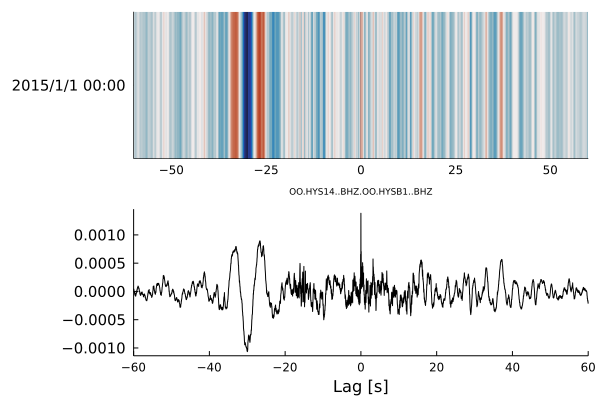

In [5]:
using SeisNoise, SeisIO, Plots
using Dates 
d=load_corr("/data/wsd01/corrdata/raw/OO.HYS14..BHZ.OO.HYSB1..BHZ.jld2","ZZ")
dailystk=stack(d,interval=Day(1))
allstk=stack(d,allstack=true)
plot(allstk)

In [ ]:
clean_up!(dailystk,0.1,0.2)
abs_max!(dailystk)
plot(dailystk)

In [6]:
dailystk

CorrData with 1958 Corrs
      NAME: "OO.HYS14..BHZ.OO.HYSB1..BHZ"      
        ID: "2015-01-01"                       
       LOC: 0.0 N, 0.0 E, 0.0 m
      COMP: "ZZ"                               
   ROTATED: false                              
 CORR_TYPE: "CC"                               
        FS: 40.0
      GAIN: 1.0
   FREQMIN: 0.01
   FREQMAX: 16.0
    CC_LEN: 1800.0
   CC_STEP: 450.0
  WHITENED: true                               
 TIME_NORM: ""                                 
      RESP: a0 1.0, f0 1.0, 0z, 0p
      MISC: 0 entries                          
     NOTES: 7 entries                          
      DIST: 0.0
       AZI: 0.0
       BAZ: 0.0
    MAXLAG: 60.0
         T: 2015-01-01T00:00:00                …
      CORR: 4801×1958 Matrix{Float32}          


### Resolving DV/V from Allstack and Daily Stack

In [7]:
using SeisDvv
fs=40.0     # sample frequency
win_len=5.0  # sliding window length
win_step=2.5 # sliding window step
j=1958
dvt=zeros(j)
cct=zeros(j)

for i in 1:j#1890
    S1=Array(allstk.corr[:])
    S2=Array(dailystk.corr[:,i])
    tmin = 40.
    tmax = 50.
    window = collect(range(Int(floor(tmin*fs)),Int(floor(tmax*fs)),step=1))
    fmin = 0.1
    fmax = 0.2

    function evenly_spaced(a, b, n)
        h = (b-a)/(n-1)
        collect(a:h:b)
    end

    time=evenly_spaced(-60,60,4801)

    dvv_ts, cc_ts, cdp_Ts, eps_ts, err_ts, allC_ts = SeisDvv.stretching(S1, S2, time, window, fmin, fmax, dvmin=-0.02, dvmax=0.02, ntrial=100);
    dvt[i]=dvv_ts
    cct[i]=cc_ts
    
end

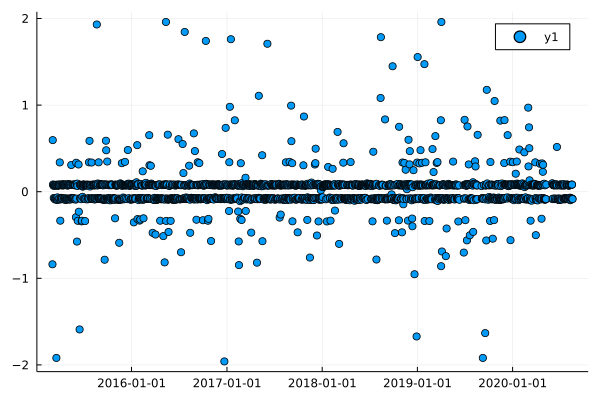

In [16]:
using Dates

r=map(unix2datetime,dailystk.t)

plot(r[63:1958],dvt[63:1958],seriestype = :scatter)

In [11]:
r

1958-element Vector{DateTime}:
 2015-01-01T00:00:00
 2015-01-02T00:00:00
 2015-01-03T00:00:00
 2015-01-04T00:00:00
 2015-01-05T00:00:00
 2015-01-06T00:00:00
 2015-01-07T00:00:00
 2015-01-08T00:00:00
 2015-01-09T00:00:00
 2015-01-10T00:00:00
 2015-01-11T00:00:00
 2015-01-12T00:00:00
 2015-01-13T00:00:00
 ⋮
 2020-08-07T00:00:00
 2020-08-08T00:00:00
 2020-08-09T00:00:00
 2020-08-10T00:00:00
 2020-08-11T00:00:00
 2020-08-12T00:00:00
 2020-08-13T00:00:00
 2020-08-14T00:00:00
 2020-08-15T00:00:00
 2020-08-16T00:00:00
 2020-08-17T00:00:00
 2020-08-18T00:00:00

In [14]:
using MarketTechnicals
a=sma(dvt[63:1958], 30)

1867×1 Matrix{Float64}:
 -0.061386071806913495
 -0.03095483897087104
 -0.053753297841474194
 -0.05887330215987532
 -0.06357766037124754
 -0.058735653124430694
 -0.06380437642962693
 -0.0692752508383771
 -0.06376659041989703
 -0.06369371740113224
 -0.05787467190272801
 -0.05767224685060356
 -0.06314042225865872
  ⋮
 -0.0025883416664979797
 -0.00187310648232492
 -0.007845995020343718
 -0.012998387347084745
 -0.012909320324149983
 -0.018426077744715018
 -0.013168424390869278
 -0.018677084809349338
 -0.013060464363069572
 -0.012677206264380613
 -0.01785928759876655
 -0.017778317577916775

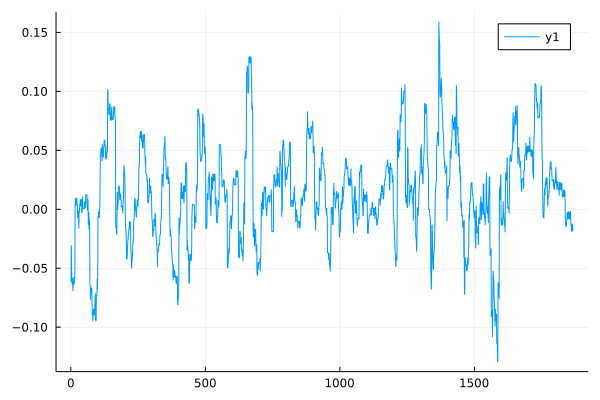

In [15]:
plot(a,seriestype = :line)

### terminal commands

htop
df
ls
cd
ls -lh


In [ ]:
function evenly_spaced(a, b, n)
    h = (b-a)/(n-1)
    collect(a:h:b)
end

time=evenly_spaced(-60,60,4801)


In [ ]:
j=2015
i=63
        if i<10
            a=string("/data/wsd01/OOI-Data/HYSB1/",string(j),"/00",string(i),"/HYSB1.OO.",string(j),".00",string(i),".SHZ")
            b=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/00",string(i),"/HYS14.OO.",string(j),".00",string(i),".SHZ")
        elseif i>=10 && i<100
            a=string("/data/wsd01/OOI-Data/HYSB1/",string(j),"/0",string(i),"/HYSB1.OO.",string(j),".0",string(i),".SHZ")
            b=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/0",string(i),"/HYS14.OO.",string(j),".0",string(i),".SHZ")
        elseif i>=100 && i<1000
            a=string("/data/wsd01/OOI-Data/HYSB1/",string(j),"/",string(i),"/HYSB1.OO.",string(j),".",string(i),".SHZ")
            b=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/",string(i),"/HYS14.OO.",string(j),".",string(i),".SHZ")
        end

S1=read_data(a)
S=read_data(b)
S.fs
fs/2

In [ ]:
merge!(S)
    ungap!(S)
	detrend!(S)         # remove mean & trend from channel
	taper!(S)                      # taper channel ends
	

In [ ]:
if fs ∉ S.fs
		filtfilt!(S,fh=Float64(fs/2),rt="Lowpass")    # lowpass filter before downsampling
	end
	resample!(S,fs=Float64(fs)) # downsample to lower fs
	taper!(S)

In [ ]:
a=zeros(2009)
for i=1:2009
    a[i]=unix2datetime(dailystk.t[i])
end

In [ ]:
filtfilt!(S,fh=Float64(18.0),rt="Lowpass")

In [ ]:
process_raw(S,40.)

In [ ]:
resample!(C,Float64(fs)) # downsample to lower fs
taper!(C)
phase_shift!(C, ϕshift=ϕshift) # timing offset from sampling period
return nothing